## Sprint6_k-means_スクラッチ
### この課題の目的
1.コーディング力を向上させる  2.全体の構造を意識したコーディングをする  3.スクラッチを通してK-meansを理解する  4.クラスタ分析を行う

### データセットの用意

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### 小規模なデータの用意

In [2]:
from sklearn.datasets import make_blobs

#　n_samples:サンプル数
# n_features：特徴量（説明変数）の数
# centers:クラスタの数　
# cluster_std:クラスタ内の標準偏差（ばらつき度合い）　
# shuffle:サンプルをシャッフル　
# random_state:乱数生成を固定

X, _ = make_blobs(n_samples =100,\
                  n_features=2, \
                  centers=4, \
                  cluster_std=0.5, \
                  shuffle=True, \
                  random_state=0)

In [3]:
X

array([[ 0.72086751,  3.71347124],
       [-1.89468423,  7.96898545],
       [ 1.35678894,  4.36462484],
       [ 1.05374379,  4.49286859],
       [ 1.59141542,  4.90497725],
       [ 0.78260667,  4.15263595],
       [-1.95751686,  3.87291474],
       [-0.77354537,  7.87923564],
       [ 0.12313498,  5.27917503],
       [-1.43284669,  7.71577043],
       [-0.92819001,  7.02698199],
       [-1.74836345,  7.06307447],
       [-1.26789718,  7.25141327],
       [-0.98661744,  7.74968685],
       [-0.81984047,  7.50994722],
       [ 2.99684287,  0.22378413],
       [ 1.46870582,  1.86947425],
       [-0.33533163,  3.390122  ],
       [-1.86407034,  2.93379754],
       [ 2.62496786,  0.28025075],
       [ 2.11114739,  3.57660449],
       [-1.8219901 ,  7.61654999],
       [-1.91186205,  3.18750686],
       [ 2.28809874,  0.12954182],
       [ 0.5285368 ,  4.49723858],
       [-1.57613028,  2.58614312],
       [-0.565433  ,  3.65813966],
       [ 0.802314  ,  4.38196181],
       [ 2.79939362,

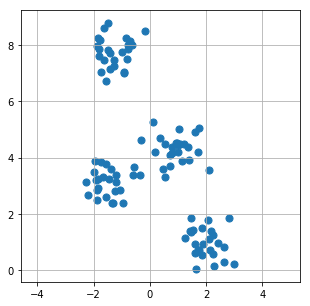

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize =(5,5))
plt.scatter(X[:,0], X[:,1], marker='o', s=50)
plt.axis('equal')
plt.grid()
plt.show()


In [5]:
label = np.random.randint(0,4,100)   # 初期のラベルを作る

In [6]:
label.shape

(100,)

In [7]:
label

array([0, 0, 3, 1, 0, 1, 1, 1, 3, 3, 3, 1, 2, 3, 3, 1, 0, 3, 1, 2, 1, 2,
       3, 2, 3, 1, 3, 1, 2, 0, 1, 1, 2, 1, 2, 3, 2, 2, 2, 0, 0, 1, 2, 1,
       3, 2, 3, 0, 0, 1, 2, 2, 0, 2, 1, 3, 2, 1, 0, 0, 1, 1, 2, 0, 3, 2,
       2, 3, 1, 3, 2, 3, 1, 0, 0, 0, 0, 2, 1, 2, 3, 0, 0, 3, 1, 1, 1, 0,
       1, 1, 3, 1, 2, 2, 1, 2, 3, 2, 3, 1])

### K-meansのクラスを作成する
K-meansのクラスScratchKMeansを作成する

In [8]:
# K-meansのクラス
class ScratchKMeans:
    
    def __init__(self, label, iteration):
        self.label = label
        self.iteration = iteration       
    
    # 中心点表を作成する関数
    def _get_center_point(self, X):
        
        # 中心点表を初期化する
        self.center_point_list = []

        for i in np.unique(self.label):

            # X0軸方向の平均
            X0_sum = X[self.label == i][:, 0].sum()
            X0_cnt = len(X[self.label == i])
            X0_point = X0_sum / X0_cnt

            # X1軸方向の平均
            X1_sum = X[self.label == i][:, 1].sum()
            X1_cnt = len(X[self.label == i])
            X1_point = X1_sum / X1_cnt

            # 中心点（重心）を求める
            center_point = [X0_point, X1_point]

            # 中心点表を作成する
            self.center_point_list.append(center_point)
            #print(self.center_point_list[1:])
    
    # 中心点と全データとの距離を求める関数
    def _get_distance(self, X):
        self._get_center_point(X)
        distance_list = np.zeros((len(X), len(self.center_point_list)))
        #print(distance_list)

        for i, values in enumerate(self.center_point_list):

            # 重心と全データとの距離を取得する
            for j in range(len(X)):
                
                # 2列目、３列目だけをとる
                diff = values - X[j]
                distance = np.linalg.norm(diff)
                distance_list[j, i] = distance
                #print(distance_list)
        
        return distance_list
    
    # 全データの一番近いクラスタラベルをゲット出来た
    def fit(self, X):
        # なので、新しいクラスラベルの値へ、古いクラスラベルを更新してあげる
        for i in range(self.iteration):
            
            # 距離表で、それぞれのXで最初のクラスラベルのインデックスを取得
            # そのインデックスは、クラスタラベルに等しい
            self.label = np.argmin(self._get_distance(X), axis=1)
            
            # 今時点の中心点を保持しておく
            pre_center_point_list = self.center_point_list
            
            # クラスタラベルを最新
            self.label = np.argmin(self._get_distance(X), axis=1)
            
            # 前後で中心点を比較
            if pre_center_point_list == self.center_point_list:
                #print("---学習終了しました---",i*2,"イテレーション回数")
                break
    
    # エルボー法 誤差平方和SSE
    # 重心座標はfitで取得出来ているので、それを使って、
    # クラスタ数が変化した時のSSEの変化度を取得する関数
    def elbow(self, X, cluster):
        self.cluster = cluster
        self.label = np.random.randint(0, self.cluster, len(X))
        
        # SSE_list
        sse_list = []
        
        # クラスタ数をパラメータとしてfitさせる
        for n in range(self.cluster):
            
            self.cluster = n + 1
            
            # クラスタラベルを作成
            self.label = np.random.randint(0, self.cluster, len(X))
            
            # 学習
            self.fit(X)
        
            # |Xn - μk||**2の枠を作成
            elbow_list = np.zeros((len(X), len(self.center_point_list)))
            
            for i, values in enumerate(self.center_point_list):

                # ||Xn - μk||**2の表を作成する
                for j in range(len(X)):    
                    elbow_diff = X[j] - values
                    
                    # ドット積でやり方
                    #elbow_list[j, i] = np.dot(elbow_diff, elbow_diff.T)
                    
                    # ノルムを取って二乗するやり方
                    elbow_list[j, i] = np.linalg.norm(elbow_diff)**2

            # 最小値を取得
            elbow_list_min = elbow_list.min(axis=1)

            # SSEを算出
            sse = elbow_list_min.sum()
            sse_list.append(sse)
            
        return sse_list

In [9]:
skm2 = ScratchKMeans(label = np.random.randint(0,4,100), iteration = 10)
skm2.fit(X)
skm2.center_point_list

[[-1.2037759767211824, 3.3742061314960523],
 [1.6015710414731053, 2.4213834624121517],
 [-1.2681173257461036, 7.763782656002402]]

In [10]:
skm2.label

array([1, 2, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 1, 1, 0, 0, 1, 1, 2,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 0, 1, 2, 1, 2, 0, 1, 0, 2, 0,
       0, 2, 1, 0, 1, 1, 0, 1, 0, 0, 0, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2,
       0, 0, 1, 1, 2, 1, 1, 2, 1, 1, 0, 0, 1, 1, 1, 2, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 2, 2, 0, 2, 0])

### クラスタリングの可視化

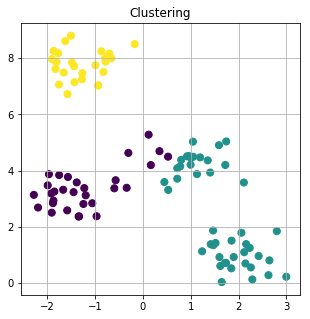

In [11]:
plt.figure(figsize =(5,5))
plt.title('Clustering')
plt.scatter(X[:,0], X[:,1], c=skm2.label , marker='o', s=50)
plt.grid()


### エルボー法

In [12]:
# # エルボー法 誤差平方和SSE
#     # 重心座標はfitで取得出来ているので、それを使って、
#     # クラスタ数が変化した時のSSEの変化度を取得する関数
# def elbow(self, X, cluster):
#     self.cluster = cluster

#     # SSE_list
#     sse_list = []

#     # クラスタ数をパラメータとしてfitさせる
#     for n in range(self.cluster):

#         self.cluster = n + 1

#         # クラスタラベルを作成
#         self.label = np.random.randint(0, self.cluster,100)

#         # 学習
#         self.fit(X)

#         # |Xn - μk||**2の枠を作成
#         elbow_list = np.zeros((len(X), len(self.center_point_list)))

#         for i, values in enumerate(self.center_point_list):

#             # ||Xn - μk||**2の表を作成する
#             for j in range(len(X)):    
#                 elbow_diff = X[j] - values

#                 # ドット積でやり方
#                 #elbow_list[j, i] = np.dot(elbow_diff, elbow_diff.T)

#                 # ノルムを取って二乗するやり方
#                 elbow_list[j, i] = np.linalg.norm(elbow_diff)**2

#         # 最小値を取得
#         elbow_list_min = elbow_list.min(axis=1)

#         # SSEを算出
#         sse = elbow_list_min.sum()
#         sse_list.append(sse)

#     return sse_list

In [13]:
# # クラスを実行
# skm２ = ScratchKMeans(cluster=4, iteration = 10)
# skm2.fit(X)
# skm2.center_point_list

In [14]:
# d1 = X[label == i][:, 0] - X0_point[:, 0]
# d2 = X[label == i][:, 1] - X0_point[:, 1]
# d =[d1, d2]
# d*d.T



# for i in range(1, 11):
#     km = KMeans(n_clusters=i, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
#     km.fit(X)
#     SSE.append(km.inertia_)

# plt.plot(range(1,11), SSE, marker='o')
# plt.xlabel('k')
# plt.ylabel('SSE')
# plt.show()


### scikit-learnでの実装

In [15]:
from sklearn.cluster import KMeans
km  = KMeans(n_clusters=4, random_state=0)
km.fit(X)
km.cluster_centers_

array([[-1.47935679,  3.11716896],
       [-1.26811733,  7.76378266],
       [ 1.99186903,  0.96561071],
       [ 0.92578447,  4.32475792]])

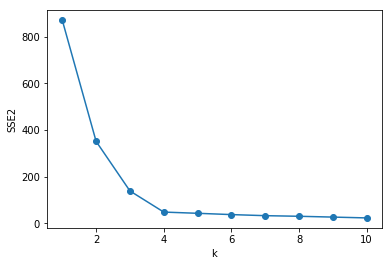

In [16]:
SSE2 = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
    km.fit(X)
    SSE2.append(km.inertia_)

plt.plot(range(1,11), SSE2, marker='o')
plt.xlabel('k')
plt.ylabel('SSE2')
plt.show()

### Wholesale customers Data

In [17]:
import numpy as np  # 線形代数ライブラリー
import pandas as pd  # データの加工, CSVファイルの読み書き
from pandas import scatter_matrix
import matplotlib.pyplot as plt  # 描画ライブラリー

import seaborn as sns  # 描画スタイル変更ライブラリ
%matplotlib inline
from sklearn.model_selection import train_test_split

data = pd.read_csv('/Users/andoutakaaki/DIC_study/Sprint6/Wholesale customers data.csv') # csvファイルの読み込み
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


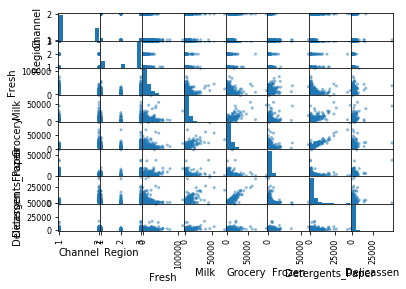

In [18]:
# 散布図行列
scatter_matrix(data)
plt.show()

In [19]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [20]:
new_data = data.drop(['Channel', 'Region'], axis=1)

### 対数変換によるスケーリングを行う

In [21]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

numeric_feats = new_data.dtypes[new_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = new_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(15)


Skew in numerical features: 



,Skew
Delicassen,11.113534
Frozen,5.887826
Milk,4.039922
Detergents_Paper,3.619458
Grocery,3.575187
Fresh,2.552583


In [22]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #new_data[feat] += 1
    new_data[feat] = boxcox1p(new_data[feat], lam)

There are 6 skewed numerical features to Box Cox transform


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


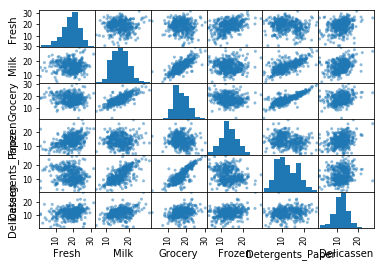

In [23]:
scatter_matrix(new_data)
plt.show()

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)     # 可視化するためにPCAで特徴量を2個に減らす
pca = pca.fit(new_data)
data_pca = pca.transform(new_data)

In [25]:
data_pca.shape

(440, 2)

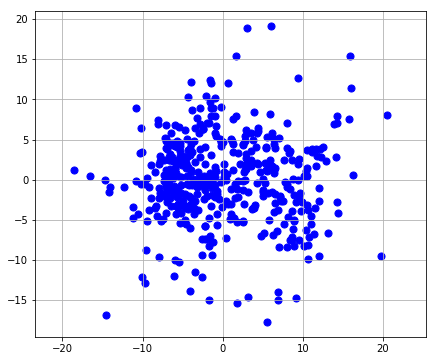

In [26]:
# 描画してみる
plt.figure(figsize=(7, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c='b', marker='o', s=50)
plt.axis('equal')
plt.grid()
plt.show()

In [27]:
skm3 = ScratchKMeans(cluster=4, iteration = 10)
skm3.elbow(data_pca, 20)
sse3 = skm2.elbow(data_pca, 20)

TypeError: __init__() got an unexpected keyword argument 'cluster'

In [ ]:
# 上手く描画出来たけど、正規化していない。。
plt.plot(range(0,20), sse3)
plt.show()

#### PCAのサンプルコード

In [ ]:
data_pca.shape

In [ ]:
label2 = np.random.randint(0,4,440)   # 初期のラベルを作る

In [ ]:
# K-meansのクラス
class ScratchKMeans:
    
    def __init__(self, label2, iteration2):
        self.label2 = label2
        self.iteration2 = iteration2       
    
    # 中心点表を作成する関数
    def _get_center_point2(self, X):
        
        # 中心点表を初期化する
        self.center_point2_list = []

        for i in np.unique(self.label2):

            # X0軸方向の平均
            X0_sum = X[self.label2 == i][:, 0].sum()
            X0_cnt = len(X[self.label2 == i])
            X0_point = X0_sum / X0_cnt

            # X1軸方向の平均
            X1_sum = X[self.label2 == i][:, 1].sum()
            X1_cnt = len(X[self.label2 == i])
            X1_point = X1_sum / X1_cnt

            # 中心点（重心）を求める
            center_point2 = [X0_point, X1_point]

            # 中心点表を作成する
            self.center_point2_list.append(center_point)
            #print(self.center_point_list[1:])
    
    # 中心点と全データとの距離を求める関数
    def _get_distance(self, X):
        self._get_center_point2(X)
        distance_list = np.zeros((len(X), len(self.center_point2_list)))
        #print(distance_list)

        for i, values in enumerate(self.center_point2_list):

            # 重心と全データとの距離を取得する
            for j in range(len(X)):
                
                # 2列目、３列目だけをとる
                diff = values - X[j]
                distance = np.linalg.norm(diff)
                distance_list[j, i] = distance
                #print(distance_list)
        
        return distance_list
    
    # 全データの一番近いクラスタラベルをゲット出来た
    def fit(self, X):
        # なので、新しいクラスラベルの値へ、古いクラスラベルを更新してあげる
        for i in range(self.iteration2):
            self.label2 = np.argmin(self._get_distance(X), axis=1)
            
            # 今時点の中心点を保持しておく
            pre_center_point2_list = self.center_point2_list
            
            # 中心を求める関数を呼び出す
            self._get_distance(X)
            
            
            # 前後で中心点を比較して同じならイテレーションを終了する
            if pre_center_point2_list == self.center_point2_list:
                print("---the END---")
                print(self.center_point2_list)
            else:
                print("--to be continued--")

In [ ]:
# クラスを実行
skm = ScratchKMeans(cluster=4, iteration = 10)
skm.fit(X)
skm.center_point_list

#### PCAの分散説明率を表示するコードサンプル

In [ ]:
# pca = PCA(n_components=None)
# pca = pca.fit(data)
# var_exp = pca.explained_variance_ratio_
# cum_var_exp = np.cumsum(var_exp)
# print(cum_var_exp)
# plt.bar(range(1,7), var_exp, alpha=0.5, align='center', label='individual explained variance')
# plt.step(range(1,7), cum_var_exp, where='mid', label='cumulative expalined variance')
# plt.ylabel('Explained variance ratio')
# plt.xlabel('Principal components')
# plt.hlines(0.7, 0, 6,  "blue", linestyles='dashed')
# plt.legend(loc='best')
# plt.grid()
# plt.show()

In [ ]:
# fig, ax = plt.subplots()
# # 散布図（クラスタ1)
# ax.scatter =(X[skm2.label == 0], [ :,0], s=50, edgecolor='black' , marker='s' , skm2.label='Cluster 1')
# # クラスタ中心（クラスタ１）
# ax.plot(center_point_list(X[skm2.label == 0, 0]), center_point_list(X[skm2.label == 0, 1]), marker='x', markersize=10, color='red' )
# # 散布図（クラスタ2)
# ax.scatter =(X[label == 1, 0], X[skm2.label == 1, 1], s=50, edgecolor='black' , marker='o' , skm2.label='Cluster 2')
# # クラスタ中心（クラスタ2）
# ax.plot(center_point_list(X[skm2.label == 1, 0]), center_point_list(X[skm2.label == 1, 1]), marker='x', markersize=10, color='red' )
# # 散布図（クラスタ3)
# ax.scatter =(X[skm2.label == 2, 0], X[skm2.label == 2, 1], s=50, edgecolor='black' , marker='v' , skm.label='Cluster 3')
# # クラスタ中心（クラスタ3）
# ax.plot(center_point_list(X[skm2.label == 2, 0]), center_point_list(X[skm2.label == 2, 1]), marker='x', markersize=10, color='red' )
# # 散布図（クラスタ4)
# ax.scatter =(X[skm2.label == 2, 1], X[skm2.label == 2, 2], s=50, edgecolor='black' , marker='D' , skm.label='Cluster 4')
# # クラスタ中心（クラスタ4）
# ax.plot(center_point_list(X[skm2.label == 2, 1]), center_point_list(X[skm2.label == 2, 2]), marker='x', markersize=10, color='red' )

In [ ]:
# for i in range(0, 4):
#     print((X[label ==i][:,0].sum(axis=0)/len(X[label ==i])),(X[label ==i][:,1].sum(axis=0)/len(X[label ==i])))

In [ ]:
# for i in np.unique(label):
#     # X0軸方向の平均
#     X0_sum = X[label == i][:, 0].sum()
#     X0_cnt = len(X[label == i])
#     X0_point = X0_sum / X0_cnt

#     # X1軸方向の平均
#     X1_sum = X[label == i][:, 1].sum()
#     X1_cnt = len(X[label == i])
#     X1_point = X1_sum / X1_cnt

#     # 中心点（重心）を求める
#     center_point = [X0_point, X1_point]
    
#     center_point_list.append(center_point)
#     distance_list = np.zeros((len(X), len(center_point_list)))
#     for i, values in enumerate(center_point_list):
#         for j in range(len(X)): 
#             diff = values - X[j]
#             distance = np.linalg.norm(diff)
#             distance_list[j, i] = distance

In [ ]:
#dff = np.zeros((100,4))  # np.zerosの箱を作る

In [ ]:
# for i in range(0, 4):
#     print((X[label ==i][:,0].sum(axis=0)/len(X[label ==i])),(X[label ==i][:,1].sum(axis=0)/len(X[label ==i])))
    

In [ ]:
# (X[label ==0][:,0].sum(axis=0)/len(X[label ==0])),(X[label ==0][:,1].sum(axis=0)/len(X[label ==0]))

In [ ]:
# a = np.array([1,2])
# b = np.array([3,4])
# c = a - b
# np.linalg.norm(c)

In [ ]:
# b = (X[label ==0][:,0].sum(axis=0)/len(X[label ==0])),(X[label ==0][:,1].sum(axis=0)/len(X[label ==0]))
# for j in range(0, 100): 
#     a = X[j,:]
#     u = b - a
#     print(np.linalg.norm(u)) 

In [ ]:
# # d = 0
# for j in range(0, 100): 
#     a = X[j,:]
#     b = (X[label ==0][:,0].sum(axis=0)/len(X[label ==0]),X[label ==0][:,1].sum(axis=0)/len(X[label ==0]))
#     u = b - a
#     print(np.linalg.norm(u))
#     d += 1
# #     print(d)

In [ ]:
# (X[label ==i][:,0].sum(axis=0)/len(X[label ==i]),X[label ==i][:,1].sum(axis=0)/len(X[label ==i]))